## Building a Neural Network from Scratch for Fashion-MNIST

#### Pre-processing Steps:
- 1: Load Fashion MNIST Data
- 2: Normalize Data
- 3: Transpose and Reshape X data
- 4: One-hot encode the y-data 
- 5: Initialize Weights and Biases Matrices

#### Neural Network Steps:
- 1: Forward Propogation
- 2: Back Propogation
- 3: Update Parameters

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images for the neural network
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T


# Convert y to one-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)


# Initialize random weights and biases
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Define a ReLU Activation Function
def ReLU(Z):
    # If Z > 0; return Z
    # Else; return 0
    return np.maximum(0, Z)

# Define a Softmax Activation Function
def softmax(Z):
    # e^z / Σ e^z
    # Returns a Probabilistic Value
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(W1, b1, W2, b2, X):
    # W1: Weights of first layer
    # B1: Bias of first layer
    # W2: Weights of second layer
    # B2: Bias of second layer
    
    #Steps:
    # Z1 = W1*X + b1
    # A1 = ReLU(Z1)
    # Z2 = W2*A1 + b2
    # A2 = Softmax(Z2)
    
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of ReLU
def ReluDerivative(Z):
    # 1 if Z > 0
    # 0 if Z < 0
    return Z > 0
    

def backpropagation(Z1, A1, Z2, A2, W2, X, Y):
    
    m = X.shape[1]

    # Calculate probability vector and actual answer
    dZ2 = A2 - Y
    
    # Compute the gradient of W2 (weights of the output layer) 
    dW2 = 1 / m * dZ2.dot(A1.T)
    
    # Compute the gradient of b2
    db2 = 1 / m * np.sum(dZ2) # Sum over all examples and average
    
    # Compute the gradient of Z1 (hidden layer pre-activation) using chain rule
    dZ1 = W2.T.dot(dZ2) * ReluDerivative(Z1)
    
    # Compute the gradient of W1 (weights of the first layer)
    dW1 = 1 / m * dZ1.dot(X.T)
    # Compute the gradient of b2
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    # Update Weights and Biases from gradients
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2




def train_neural_network(X, Y, iterations=2000, learning_rate=0.1):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations+1):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backpropagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 100 == 0:
            predictions = np.argmax(A2, axis=0)
            accuracy = np.mean(predictions == np.argmax(Y, axis=0))
            print(f"Iteration {i}: Accuracy = {accuracy}")
    return W1, b1, W2, b2

# Train the neural network
trained_W1, trained_b1, trained_W2, trained_b2 = train_neural_network(X_train, y_train_one_hot)


Iteration 0: Accuracy = 0.09641666666666666
Iteration 100: Accuracy = 0.6231166666666667
Iteration 200: Accuracy = 0.6810666666666667
Iteration 300: Accuracy = 0.7204166666666667
Iteration 400: Accuracy = 0.7386666666666667
Iteration 500: Accuracy = 0.7489666666666667
Iteration 600: Accuracy = 0.7574833333333333
Iteration 700: Accuracy = 0.76535
Iteration 800: Accuracy = 0.7718
Iteration 900: Accuracy = 0.77775
Iteration 1000: Accuracy = 0.7828833333333334
Iteration 1100: Accuracy = 0.78795
Iteration 1200: Accuracy = 0.7924833333333333
Iteration 1300: Accuracy = 0.7993666666666667
Iteration 1400: Accuracy = 0.8021
Iteration 1500: Accuracy = 0.8045333333333333
Iteration 1600: Accuracy = 0.8065166666666667
Iteration 1700: Accuracy = 0.8084833333333333
Iteration 1800: Accuracy = 0.8105
Iteration 1900: Accuracy = 0.8115333333333333
Iteration 2000: Accuracy = 0.8127666666666666


### Test Accuracy:

In [48]:
def test_neural_network(W1, b1, W2, b2, X_test, Y_test):
    _, _, _, output = forward_propagation(W1, b1, W2, b2, X_test)
    
    predictions = np.argmax(output, axis=0)
    accuracy = np.mean(predictions == np.argmax(Y_test, axis=0))
    print(f"Test Accuracy: {accuracy}")
    return accuracy

# Run the test function on the trained model
test_accuracy = test_neural_network(trained_W1, trained_b1, trained_W2, trained_b2, X_test, y_test_one_hot)


Test Accuracy: 0.802


## Testing 5 examples

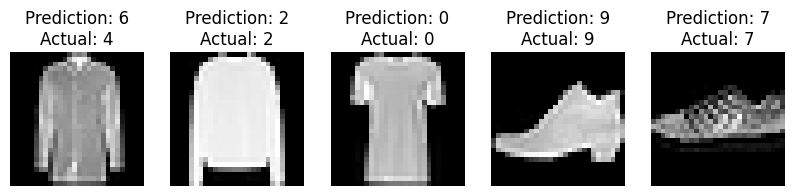

In [50]:
import matplotlib.pyplot as plt

def test_random_examples(W1, b1, W2, b2, X_test, Y_test, num_examples=5):
    indices = np.random.choice(X_test.shape[1], num_examples, replace=False)  # Select random indices
    X_sample = X_test[:, indices]  
    Y_sample = Y_test[:, indices]  


    _, _, _, output = forward_propagation(W1, b1, W2, b2, X_sample)
    predictions = np.argmax(output, axis=0)

    # Plot the images with predictions
    fig, axes = plt.subplots(1, num_examples, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(X_sample[:, i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Prediction: {predictions[i]}\nActual: {np.argmax(Y_sample[:, i])}")
        ax.axis('off')

    plt.show()

# Run the function to test random examples
test_random_examples(trained_W1, trained_b1, trained_W2, trained_b2, x_test, y_test_one_hot)
